In [2]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample




# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [3]:
labels = train_data.columns[3:].tolist()

print("labels: {}".format(labels))

X = train_data[labels].values
y = train_data['purchase'].values

labels: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']


In [11]:
from yellowbrick.target import ClassBalance

def class_balance(y):
    
    y = pd.Series(y).map({0:'No', 1:'Yes'}).values
    visualizer = ClassBalance(labels=['No', 'Yes'])

    visualizer.fit(y)
    viz_show = visualizer.show()
    
    return viz_show
    

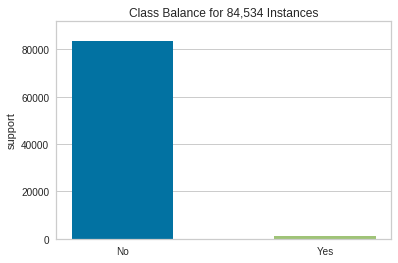

In [8]:
class_balance_viz = class_balance(y)

In [9]:
def upsample(df, column):
    
    # Up-sample Minority Class approach from Elite Data Science 
    # https://elitedatascience.com/imbalanced-classes


    # Seperate majority and minority classes
    df_majority = df[df[column] == 0]
    df_minority = df[df[column] == 1]
    
    majority_n_samples = df[column].value_counts()[0]
    
    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=majority_n_samples,
                                random_state=42)

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    
    return df_upsampled

df_upsampled = upsample(train_data, 'purchase')
df_upsampled.purchase.value_counts()

1    83494
0    83494
Name: purchase, dtype: int64

In [10]:
X_upsampled = df_upsampled[labels].values
y_upsampled = df_upsampled['purchase'].values

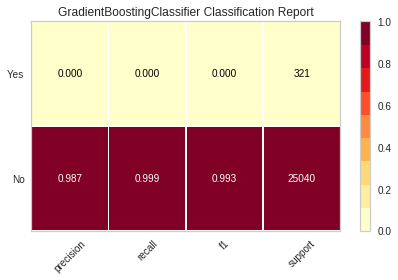

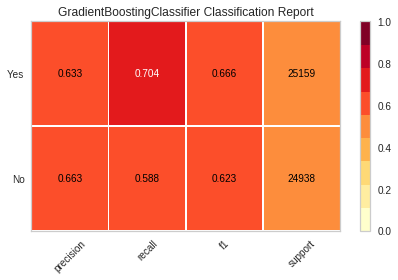

In [18]:
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
def classification_report(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    
    
    classes = ["No", "Yes"]
    
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    viz_show = visualizer.show()
    
    
    
    return viz_show

classification_report_ = classification_report(X, y, GradientBoostingClassifier())
classification_report_upsampled = classification_report(X_upsampled, y_upsampled, GradientBoostingClassifier())

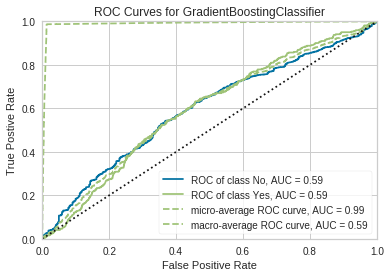

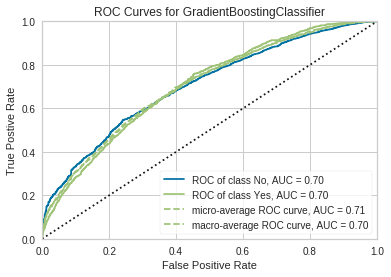

In [19]:
from yellowbrick.classifier import ROCAUC
def rocauc(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    
    
    classes = ["No", "Yes"]
    
    visualizer = ROCAUC(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    viz_show = visualizer.show()
    
    
    
    return viz_show

rocauc_ = rocauc(X, y, GradientBoostingClassifier())

rocauc_upsampled = rocauc(X_upsampled, y_upsampled, GradientBoostingClassifier())

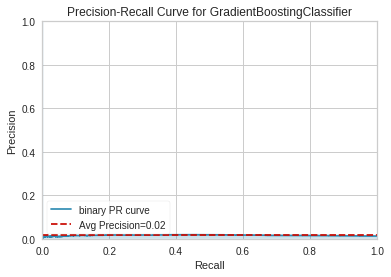

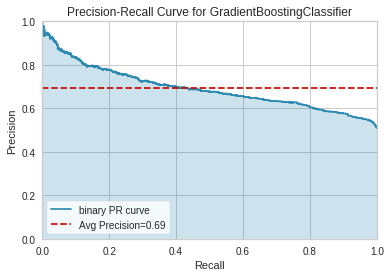

In [20]:
from yellowbrick.classifier import PrecisionRecallCurve
def pr_curve(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    
    
    classes = ["No", "Yes"]
    
    visualizer = PrecisionRecallCurve(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    viz_show = visualizer.show()
    
    
    
    return viz_show

pr_curve_ = pr_curve(X, y, GradientBoostingClassifier())
pr_curve_upsampled = pr_curve(X_upsampled, y_upsampled, GradientBoostingClassifier())

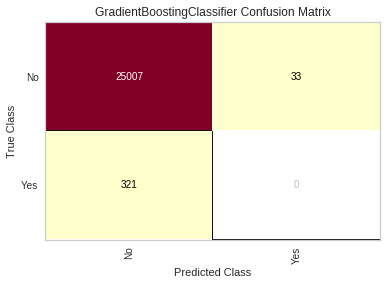

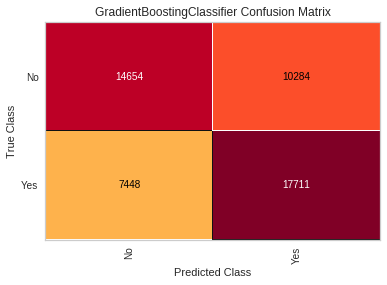

In [22]:
from yellowbrick.classifier import ConfusionMatrix
def confusion_matrix(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
    
    classes = ["No", "Yes"]
    
    visualizer = ConfusionMatrix(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    visualizer_show = visualizer.show()
    
    
    
    return visualizer_show

confusion_matrix_ = confusion_matrix(X, y, GradientBoostingClassifier())
confusion_matrix_upsampled = confusion_matrix(X_upsampled, y_upsampled, GradientBoostingClassifier())    